In [130]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [131]:
df1 = pd.read_csv(r"/content/Energy Data.csv")
df2 = pd.read_csv(r"/content/cross-country-literacy-rates.csv")

# Standardize the country columns to ensure proper alignment
df1['country'] = df1['country'].str.strip().str.lower()
df2['Entity'] = df2['Entity'].str.strip().str.lower()

# Merge the dataframes on standardized country columns and year
C_df = pd.merge(df1, df2, left_on=["country", "year"], right_on=["Entity", "Year"], how="inner")
C_df = C_df.drop(columns=['Entity', 'Year', 'Code'])

# Check the combined dataframe
C_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Literacy rate
0,afghanistan,1979,AFG,12986378.0,1.591379e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00000
1,afghanistan,2011,AFG,29249156.0,5.332634e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,31.00000
2,afghanistan,2015,AFG,33753500.0,6.278339e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,33.75384
3,afghanistan,2021,AFG,40099460.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,37.00000
4,albania,2001,ALB,3153615.0,1.656384e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,99.00000


# Data Preprocessing

In [132]:
# Replace NaN values with the mean for each column
for col in C_df.columns:
    if pd.api.types.is_numeric_dtype(C_df[col]):  # Check if the column is numeric
       C_df[col] = C_df[col].fillna(C_df[col].mean())

C_df = C_df.sort_values(["country", "year"])
C_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Literacy rate
0,afghanistan,1979,AFG,12986378.0,1.591379e+10,35.20279,4.935632,99.608161,69.428935,36.15065,...,0.24279,129.050626,13.648376,93.092017,42.778646,18.423244,154.303745,1.26343,0.682916,18.00000
1,afghanistan,2011,AFG,29249156.0,5.332634e+10,35.20279,4.935632,99.608161,69.428935,0.00000,...,0.24279,129.050626,13.648376,93.092017,0.000000,0.000000,154.303745,0.00000,0.682916,31.00000
2,afghanistan,2015,AFG,33753500.0,6.278339e+10,35.20279,4.935632,99.608161,69.428935,0.00000,...,0.24279,129.050626,13.648376,93.092017,0.000000,0.000000,154.303745,0.00000,0.682916,33.75384
3,afghanistan,2021,AFG,40099460.0,8.792774e+11,35.20279,4.935632,99.608161,69.428935,0.00000,...,0.24279,129.050626,13.648376,93.092017,0.000000,0.000000,154.303745,0.00000,0.682916,37.00000
4,albania,2001,ALB,3153615.0,1.656384e+10,35.20279,4.935632,99.608161,69.428935,0.00000,...,0.24279,129.050626,13.648376,93.092017,0.000000,0.000000,154.303745,0.00000,0.682916,99.00000


In [133]:
C_df.isna().sum()

,0
country,0
year,0
iso_code,185
population,0
gdp,0
...,...
wind_electricity,0
wind_energy_per_capita,0
wind_share_elec,0
wind_share_energy,0


In [134]:
C_df = C_df.drop_duplicates()
C_df = C_df.dropna(axis=1, how='all') #Remove Columns with All Empty Data
C_df = C_df.dropna(how='all') #Remove Rows with All Empty Data
C_df = C_df.drop(columns=['iso_code'])
C_df = C_df.drop(columns=['biofuel_cons_change_pct','biofuel_cons_change_twh','biofuel_share_elec','biofuel_share_energy','biofuel_elec_per_capita','biofuel_cons_per_capita'])
C_df = C_df.drop(columns=['coal_cons_change_pct','coal_cons_change_twh','coal_cons_per_capita','coal_prod_change_pct','coal_prod_change_twh','coal_prod_per_capita','coal_elec_per_capita','coal_share_elec','coal_share_energy'])
C_df = C_df.drop(columns=['electricity_demand','electricity_generation','electricity_share_energy'])
C_df = C_df.drop(columns=['gas_cons_change_pct','gas_cons_change_twh','gas_prod_change_pct','gas_prod_change_twh','gas_share_elec','gas_share_energy','gas_elec_per_capita','gas_energy_per_capita','gas_prod_per_capita'])
C_df = C_df.drop(columns=['hydro_cons_change_pct','hydro_cons_change_twh','hydro_elec_per_capita','hydro_energy_per_capita','hydro_share_elec','hydro_share_energy'])
C_df = C_df.drop(columns=['nuclear_cons_change_pct','nuclear_cons_change_twh','nuclear_share_elec','nuclear_share_energy','nuclear_elec_per_capita','nuclear_energy_per_capita'])
C_df = C_df.drop(columns=['oil_cons_change_pct','oil_cons_change_twh','oil_prod_change_pct','oil_prod_change_twh','oil_share_elec','oil_share_energy','oil_elec_per_capita','oil_energy_per_capita','oil_prod_per_capita'])
C_df = C_df.drop(columns=['other_renewables_cons_change_pct','other_renewables_cons_change_twh','other_renewables_share_elec','other_renewables_share_energy','other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','other_renewables_elec_per_capita','other_renewables_energy_per_capita','other_renewable_exc_biofuel_electricity'])
C_df = C_df.drop(columns=['renewables_cons_change_pct','renewables_cons_change_twh','renewables_share_elec','renewables_share_energy','renewables_elec_per_capita','renewables_energy_per_capita'])
C_df = C_df.drop(columns=['solar_cons_change_pct','solar_cons_change_twh','solar_elec_per_capita','solar_share_elec','solar_share_energy','solar_energy_per_capita'])
C_df = C_df.drop(columns=['wind_cons_change_pct','wind_cons_change_twh','wind_elec_per_capita','wind_share_elec','wind_energy_per_capita','wind_share_energy'])
C_df = C_df.drop(columns=['fossil_share_energy','fossil_share_elec','fossil_cons_change_pct','fossil_cons_change_twh','fossil_elec_per_capita','fossil_energy_per_capita'])
C_df = C_df.drop(columns=['energy_cons_change_pct','energy_cons_change_twh'])
C_df = C_df.drop(columns=['low_carbon_cons_change_pct','low_carbon_cons_change_twh','low_carbon_share_elec','low_carbon_elec_per_capita','low_carbon_energy_per_capita','low_carbon_share_energy'])
C_df = C_df.drop(columns=['net_elec_imports','net_elec_imports_share_demand'])
C_df = C_df.drop(columns=['energy_per_capita','energy_per_gdp'])
C_df = C_df.drop(columns=['per_capita_electricity'])
C_df = C_df.drop(columns=['carbon_intensity_elec'])
C_df = C_df.drop(columns=['greenhouse_gas_emissions'])
C_df = C_df[C_df['country'] != 'asean']
C_df = C_df.drop(C_df.index[0:23])


In [135]:
C_df.isna().sum()

,0
country,0
year,0
population,0
gdp,0
biofuel_consumption,0
biofuel_electricity,0
coal_consumption,0
coal_electricity,0
coal_production,0
fossil_electricity,0


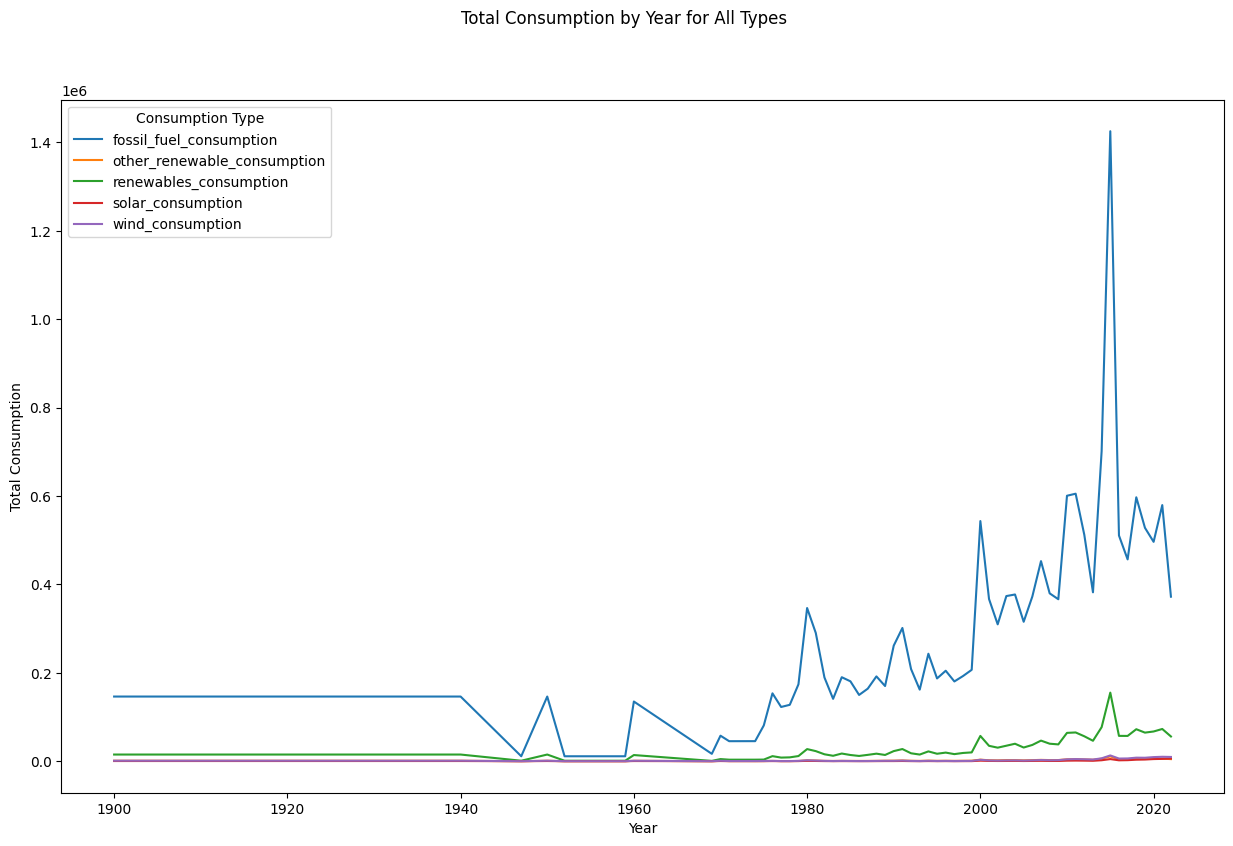

In [136]:
# Select only the columns related to consumption
consumption_columns = ['fossil_fuel_consumption','other_renewable_consumption','renewables_consumption','solar_consumption','wind_consumption']


# Group by 'Year' and sum all consumption-related columns
yearly_consumption = C_df.groupby('year')[consumption_columns].sum()

# Plot the data
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Total Consumption by Year for All Types')

# Plot each type of Consumption
yearly_consumption.plot(ax=ax)

# Set axis labels and legend
ax.set_ylabel('Total Consumption')
ax.set_xlabel('Year')
ax.legend(title="Consumption Type")

# Show the plot
plt.show()

In [137]:
X = data[["country", "year", "population", "gdp", "Literacy rate"]]
y = data["fossil_fuel_consumption"]

X_train, X_test, y_train, y_test = split(X, y, test_size=0.1, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_enc = encoder.fit_transform(X_train[['country']]).toarray()
X_train_enc = pd.DataFrame(X_train_enc,
                           columns = encoder.get_feature_names_out(['country']),
                           index = X_train.index)

X_test_enc = encoder.transform(X_test[['country']]).toarray()
X_test_enc = pd.DataFrame(X_test_enc,
                          columns = encoder.get_feature_names_out(['country']),
                          index = X_test.index)

X_train = pd.concat([X_train.drop(columns=['country']), X_train_enc], axis = 1)
X_test = pd.concat([X_test.drop(columns=['country']), X_test_enc], axis = 1)

pca = PCA(n_components=5)
X_train = pd.DataFrame(pca.fit_transform(X_train), index = X_train.index)
X_test = pd.DataFrame(pca.transform(X_test), index = X_test.index)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                       columns = X_train.columns,
                       index = X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test),
                      columns = X_test.columns,
                      index = X_test.index)


In [147]:
models = {}
models['lr'] = LinearRegression()
models['knn'] = KNeighborsRegressor()
models['ridge'] = Ridge()
models['svr'] = SVR()
models['dt'] = DecisionTreeRegressor()
models['rf'] = RandomForestRegressor()
models['gb'] = GradientBoostingRegressor()
models['mlp'] = MLPRegressor(max_iter=100000)

for n in models:
    models[n].fit(X_train, y_train)

    r2 = models[n].score(X_train, y_train)
    print(n, r2)

lr 0.3108691868060287
knn 0.9258193026651794
ridge 0.31086903584186154
svr 0.0008349829869459535
dt 1.0
rf 0.9926554489158057
gb 0.994438031353103
mlp 0.9535765600301803


In [139]:
X = data[["country", "year", "population", "gdp", "Literacy rate"]]
y = data[["solar_consumption", "wind_consumption"]].sum(axis = 1) / 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_enc = encoder.fit_transform(X_train[['country']]).toarray()
X_train_enc = pd.DataFrame(X_train_enc,
                           columns = encoder.get_feature_names_out(['country']),
                           index = X_train.index)

X_test_enc = encoder.transform(X_test[['country']]).toarray()
X_test_enc = pd.DataFrame(X_test_enc,
                          columns = encoder.get_feature_names_out(['country']),
                          index = X_test.index)

X_train = pd.concat([X_train.drop(columns=['country']), X_train_enc], axis = 1)
X_test = pd.concat([X_test.drop(columns=['country']), X_test_enc], axis = 1)

pca = PCA(n_components=5)
X_train = pd.DataFrame(pca.fit_transform(X_train), index = X_train.index)
X_test = pd.DataFrame(pca.transform(X_test), index = X_test.index)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                       columns = X_train.columns,
                       index = X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test),
                      columns = X_test.columns,
                      index = X_test.index)

In [140]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)

mae = mean_absolute_error(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = mean_squared_error(y_test, model.predict(X_test)) ** (1 / 2)

print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: 1.0
MAE: 17.965764429560018
MSE: 5316.497262256797
RMSE: 72.91431452229936


In [155]:
# Define features (X) and target variable (y)
X = data[["year", "population", "gdp"]]  # Removed country for simplicity
y = data["Literacy rate"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train a DecisionTreeRegressor model
model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = model.score(X_test_scaled, y_test)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 9.517263746031746
Mean Squared Error (MSE): 253.526657654487
Root Mean Squared Error (RMSE): 15.922520455458269
R-squared (R2): 0.4370937842640986
